In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
# load a csv from a file to a dataframe. The data has no index column
def load_experiment_data(filename):
    """Loads a csv from a file to a dataframe. The data has no index column"""
    df = pd.read_csv(filename, index_col=False)
    return df

# Write a function that extracts the list of columns from a dataframe
def extract_columns(df, columns):
    """Extracts the list of columns from a dataframe"""
    return df[columns]

In [21]:
# The data has the following columns:
#  N (2^),naiveMemcpy,registerMemcpy,glbShrMemcpy,scanIncAddI32,scanIncCPU,singlePassScanAuxBlock,singlePassScanLookback
# 
# The first column is the size of the array used in 
# our computations. All subsequent columns are the
# experiments measured in GB/s.
# Create a plot of the data where the x-axis is the
# size of the array and the y-axis is the GB/s.
# The x axis should be labeled "Array size (2^n)" and
# have tics between 10 and 30. The y axis should be 
# labeled "GB/s" and should be between 0 and 1500. 
# The plot should have a legend and a grid.
# The grid should be gray and dashed.
# 
# The function should take as arguments the dataframe
# and a list of the columns to plot, along with labels
# for each column. It should also take a filename argument,
# Where if it is set to anything other than None, the plot
# should be saved to that filename.

def plot_experiment_data(df, columns, labels, filename=None):
    plt.figure(figsize=(6, 4))
    plt.xlabel('Array size (2^n)')
    plt.ylabel('GB/s')
    plt.xticks(np.arange(10, 31, 1))
    plt.yticks(np.arange(0, 1501, 200))
    plt.grid(color="lightgray")
    for i in range(len(columns)):
        plt.plot(df['N (2^)'], df[columns[i]], label=labels[i])
    plt.legend()
    plt.show()

    if filename:
        plt.savefig(filename, dpi=300)

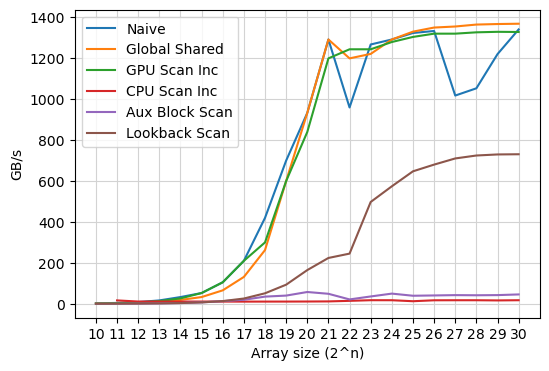

In [22]:
# Now plot the data
filename = "results-256-40.csv"
columns = ["naiveMemcpy", "glbShrMemcpy", "scanIncAddI32", "scanIncCPU", "singlePassScanAuxBlock", "singlePassScanLookback"]
labels = ["Naive", "Global Shared", "GPU Scan Inc", "CPU Scan Inc", "Aux Block Scan", "Lookback Scan"]
df = load_experiment_data(filename)
plot_experiment_data(df, columns, labels)

In [23]:
# print a dataframe like the one created above to a latex table
def print_to_latex(df):
    latex_table = df.to_latex(index=False, float_format="%.2f")
    print(latex_table)

In [24]:
heatmap_file_example = """
Q: 2
i: 10 - 0.61
i: 11 - 1.06
i: 12 - 1.77
i: 13 - 2.91
i: 14 - 4.44
i: 15 - 6.72
i: 16 - 8.53
i: 17 - 10.87
i: 18 - 12.75
i: 19 - 17.02
i: 20 - 18.64
i: 21 - 21.89
i: 22 - 20.72
i: 23 - 20.02
i: 24 - 20.88
i: 25 - 20.54
i: 26 - 20.09
i: 27 - 20.10
i: 28 - 19.29
i: 29 - 20.29
i: 30 - 19.65

Q: 4
i: 10 - 0.78
i: 11 - 1.37
i: 12 - 2.34
i: 13 - 3.97
i: 14 - 6.55
i: 15 - 10.08
i: 16 - 14.56
i: 17 - 19.42
i: 18 - 25.73
i: 19 - 29.23
i: 20 - 37.62
i: 21 - 37.37
i: 22 - 36.77
i: 23 - 39.83
i: 24 - 38.77
i: 25 - 41.10
i: 26 - 40.49
i: 27 - 39.75
i: 28 - 39.86
i: 29 - 38.27
i: 30 - 40.21
"""

In [25]:
# Above is an example of a file that contains the output of a heatmap computation. Each file is denoted by a batch size B. In the file is some headers denoted by Q. Each Q is followed by lines starting with an integer i. Each integer i is followed by a dash and a number. The number is the time it took to compute the heatmap for that batch size and that array size. After the lines for a Q, there is a blank line denoting a shift to the next Q. After the last Q, there is a blank line.
# Write a function that takes a list of files with names like "heatmap-b{B}.txt" and covert the format described to a 3-dimensional numpy array with the 1st axis being B, the second axis being Q, and the 3rd axis being i.

def load_heatmap_data(filenames):
    """Takes a list of files with names like "heatmap-b{B}.txt" and covert the format described to a 3-dimensional numpy array with the 1st axis being B, the second axis being Q, and the 3rd axis being i."""
    data = []
    for filename in filenames:
        with open(filename) as f:
            lines = f.readlines()
            data.append([])
            for line in lines:
                if line.startswith("Q"):
                    data[-1].append([])
                elif line.startswith("i"):
                    data[-1][-1].append(float(line.split(" - ")[1]))
    return np.array(data)

In [26]:
# Try this function on the file "heatmap-b32.txt"

filenames = ["heatmap-b32.txt"]
data = load_heatmap_data(filenames)
data.shape

(1, 12, 21)